# Did Mendel cook up his data?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.io
import math
import random

#### Building up functions to simulate pea crossing (Mendel spent 10 years, I only spend some hours. Lucky me).

In [2]:
Dom = 'A'
Rec = 'a'
Plant1 = [Dom,Rec]
Plant2 = [Dom,Rec]

Crosses = 10000
homo_dom = 0
hetero = 0
homo_rec = 0
for i in range(Crosses):
    cross = [random.choice(Plant1),random.choice(Plant2)]
    if cross.count(Dom) == 2:
        homo_dom += 1
    elif cross.count(Rec) == 2:
        homo_rec += 1
    else:
        hetero += 1

In [3]:
print(f"Offspring totals: AA: {homo_dom}, Aa: {hetero}, aa: {homo_rec}")
print(f"AA:Aa:aa -- {homo_dom/homo_dom:.2f}:{hetero/homo_dom:.2f}:{homo_rec/homo_dom:.2f}")

Offspring totals: AA: 2393, Aa: 5065, aa: 2542
AA:Aa:aa -- 1.00:2.12:1.06


In [4]:
pea1 = ['AB','Ab','aB','ab']
pea2 = ['AB','Ab','aB','ab']

dom_dom = ['ABAB','ABAb','ABaB','ABab','AbAB','AbaB','aBAB','aBAb','abAB']
dom_rec = ['AbAb','Abab','abAb']
rec_dom = ['aBaB','aBab','abaB']

DD = 0
Dr = 0
rD = 0
rr = 0

for i in range(Crosses):
    cross = ''.join([random.choice(pea1),random.choice(pea2)])
    if cross in dom_dom:
        DD += 1
    elif cross in dom_rec:
        Dr += 1
    elif cross in rec_dom:
        rD += 1
    else:
        rr += 1

In [5]:
print(f"Offspring totals: Dom-Dom: {DD}, Dom-Rec: {Dr}, Rec-Dom: {rD}, Rec-Rec: {rr}")
print(f"Dom-Dom:Dom-Rec:Rec-Dom:Rec-Rec -- {DD/rr:.2f}:{Dr/rr:.2f}:{rD/rr:.2f}:{rr/rr:.2f}")

Offspring totals: Dom-Dom: 5525, Dom-Rec: 1855, Rec-Dom: 1959, Rec-Rec: 661
Dom-Dom:Dom-Rec:Rec-Dom:Rec-Rec -- 8.36:2.81:2.96:1.00


In [6]:
def cross_one_trait(gen1,gen2,crosses):
    """
    Cross two plants however many times! Provide gen1 and gen2, genotype of plant 1 and 2,
    respectively, as lists of str.
    offspring - int, number of offspring to generate.
    """
    offspring = []

    for i in range(crosses):
        offspring.append([random.choice(gen1),random.choice(gen2)])
        
    return offspring

In [7]:
out = cross_one_trait(Plant1,Plant2,Crosses)
len(out)

10000

### Calculating Edward’s $\chi$-statistic
### $\chi = \frac{Obs - Np}{\sqrt{Npq}}$  
### and comparing it to the $\chi^2$-statistic obtained using the formula
### $\chi^2 = \sum\limits_{i}\frac{(O_{i}-E_{i})^2}{E_{i}}$
### They should be identical

In [8]:
Edwards = pd.read_csv('EdwardsTable2.csv',delimiter=', ')
Edwards['prob1'] = (Edwards['Exp1']/(Edwards['Exp1']+Edwards['Exp2']))
Edwards['prob2'] = (Edwards['Exp2']/(Edwards['Exp1']+Edwards['Exp2']))
Edwards['$\chi$'] = (Edwards['Obs1'] - (Edwards['Total']*Edwards['prob1']))/np.sqrt(Edwards['Total']*Edwards['prob1']*Edwards['prob2'])
Edwards['Squared $\chi$'] = Edwards['$\chi$']**2
Edwards['$\chi^2$'] = (Edwards['Obs1'] - (Edwards['Total']*Edwards['prob1']))**2/(Edwards['Total']*Edwards['prob1']) + (Edwards['Obs2'] - (Edwards['Total']*Edwards['prob2']))**2/(Edwards['Total']*Edwards['prob2'])
Edwards

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Experiment,Character,Exp1,Exp2,Obs1,Obs2,Total,prob1,prob2,$\chi$,Squared $\chi$,$\chi^2$
0,1,A,3.0,1.0,5138,1749,6887,0.75,0.25,-0.758317,0.575045,0.575045
1,2,B,3.0,1.0,5667,1878,7545,0.75,0.25,0.219343,0.048111,0.048111
2,3,A,3.0,1.0,45,12,57,0.75,0.25,0.688247,0.473684,0.473684
3,4,A,3.0,1.0,27,8,35,0.75,0.25,0.292770,0.085714,0.085714
4,5,A,3.0,1.0,24,7,31,0.75,0.25,0.311086,0.096774,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,B among Aa,1.0,1.0,24,25,49,0.50,0.50,-0.142857,0.020408,0.020408
80,81,B among aa,1.0,1.0,22,27,49,0.50,0.50,-0.714286,0.510204,0.510204
81,82,G,1.0,1.0,87,79,166,0.50,0.50,0.620920,0.385542,0.385542
82,83,C among Gg,1.0,1.0,47,40,87,0.50,0.50,0.750479,0.563218,0.563218


### Regardless of the details of the biology, Mendel’s laws allow us to make quantitative predictions of the phenotypic ratios of any particular trait. These expectations are given in the Exp1 and Exp2 columns. Using these expected ratios, I'll simulate one of Mendel’s experiments many times and calculate the $\chi$ and $\chi^2$ statistics for each simulation.

Since I have a computer at my disposal I can safely simulate 10,000 crossings!

In [9]:
def get_cdfs(dist_data):
    """
    Returns the sorted unique value of dist_data, and a list of percentiles (after normalizing)
    """
    
    data_sorted = np.sort(dist_data)

    perc = np.arange(len(dist_data)) / (len(dist_data) - 1)
    
    return data_sorted,perc

In [10]:
N_sim = 10000
pDom = Edwards.loc[0,'prob1']
pRec = Edwards.loc[0,'prob2']
num_cross = Edwards.loc[0,'Total']
mendel_chi = Edwards.loc[0,'$\chi$']
mendel_chisquare = Edwards.loc[0,'$\chi^2$']
chi = []
chi_square = []

for i in range(N_sim):
    experiment = cross_one_trait(Plant1,Plant2,num_cross)
    rec = experiment.count([Rec,Rec])
    dom = num_cross - rec
    chi.append((dom - (num_cross*pDom))/math.sqrt(num_cross*pDom*pRec))
    temp = (dom - (num_cross*pDom))**2/(num_cross*pDom) + (rec - (num_cross*pRec))**2/(num_cross*pRec)
    chi_square.append(temp)
    
chi_CDF = get_cdfs(chi)
chi_square_CDF = get_cdfs(chi_square)

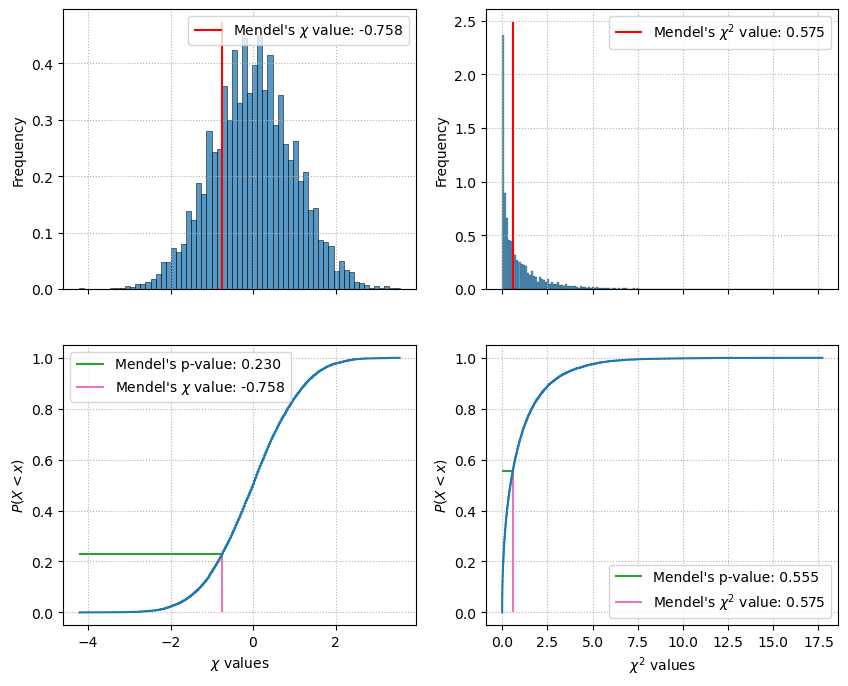

In [11]:
fig,[[ax,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(10,8),sharex='col')
sns.histplot(chi,stat='density',ax=ax)
ax.set_ylabel('Frequency')
ax.set_xlabel('$\chi$ values')
ax.vlines(mendel_chi,0,ax.get_ylim()[-1],color='r',label=f"Mendel's $\chi$ value: {mendel_chi:.3f}")
ax.grid(linestyle=':')
ax.legend(loc='best')

sns.histplot(chi_square,stat='density',ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('$\chi^2$ values')
ax1.vlines(mendel_chisquare,0,ax1.get_ylim()[-1],color='r',label=f"Mendel's $\chi^2$ value: {mendel_chisquare:.3f}")
ax1.grid(linestyle=':')
ax1.legend(loc='best')

ax2.step(chi_CDF[0],chi_CDF[1])
ax2.set_xlabel('$\chi$ values')
ax2.set_ylabel('$P(X<x)$')
ax2.hlines(chi_CDF[1][chi_CDF[0] <= mendel_chi][-1],min(chi_CDF[0]),mendel_chi,color = 'C2',label=f"Mendel's p-value: {chi_CDF[1][chi_CDF[0] <= mendel_chi][-1]:.3f}")
ax2.vlines(mendel_chi,0,chi_CDF[1][chi_CDF[0] <= mendel_chi][-1],color='C6',label=f"Mendel's $\chi$ value: {mendel_chi:.3f}")
ax2.grid(linestyle=':')
ax2.legend(loc='best')

ax3.step(chi_square_CDF[0],chi_square_CDF[1])
ax3.set_xlabel('$\chi^2$ values')
ax3.set_ylabel('$P(X<x)$')
ax3.hlines(chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1],min(chi_square_CDF[0]),mendel_chisquare,color = 'C2',label=f"Mendel's p-value: {chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}")
ax3.vlines(mendel_chisquare,0,chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1],color = 'C6',label=f"Mendel's $\chi^2$ value: {mendel_chisquare:.3f}")
ax3.grid(linestyle=':')
ax3.legend(loc='best')
plt.show()

The p-values report the empirical probability of observing a statistic smaller than or equal than Mendel’s.  
And the probability of observing a statistic smaller:

In [12]:
print(f"For the bottom-left: {1-chi_CDF[1][chi_CDF[0] <= mendel_chi][-1]:.3f},"
      "For the bottom-right: {1-chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}")

For the bottom-left: 0.770,For the bottom-right: {1-chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}


### I will now simulate all of Mendel’s experiments several times, and calculate the $\chi^2$ statistic for each experiment in the simulation, and sum the $\chi^2$ values from all the experiments in a given simulation. Finally, I'll sum the $\chi^2$ statistics from Mendel’s data.

In [13]:
total_chi_square = []
total_mendel_chisquare = 0

for i in range(N_sim):
    chi_square = []
    
    for j in range(len(Edwards)):
        pDom = Edwards.loc[j,'prob1']
        pRec = Edwards.loc[j,'prob2']
        num_cross = Edwards.loc[j,'Total']
        if i==0:
            total_mendel_chisquare += Edwards.loc[j,'$\chi^2$']

        dom = np.sum(np.random.rand(num_cross) <= pDom)
        rec = num_cross - dom
        temp = (dom - (num_cross*pDom))**2/(num_cross*pDom) + (rec - (num_cross*pRec))**2/(num_cross*pRec)
        chi_square.append(temp)
        
    total_chi_square.append(np.sum(chi_square))

In [14]:
CDF_totalchi = get_cdfs(total_chi_square)

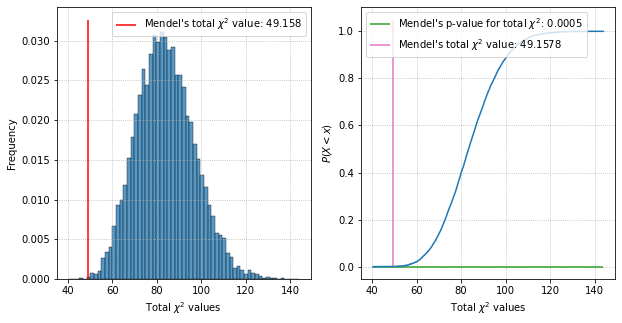

In [15]:
%matplotlib inline

fig1,[ax4,ax5] = plt.subplots(1,2,figsize=(10,5))
sns.histplot(total_chi_square,stat='density',ax=ax4)
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Total $\chi^2$ values')
ax4.vlines(total_mendel_chisquare,0,ax4.get_ylim()[-1],color='r',label=f"Mendel's total $\chi^2$ value: {total_mendel_chisquare:.3f}")
ax4.grid(linestyle=':')
ax4.legend(loc='best')

ax5.step(CDF_totalchi[0],CDF_totalchi[1])
ax5.set_xlabel('Total $\chi^2$ values')
ax5.set_ylabel('$P(X<x)$')
ax5.hlines(CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1],min(CDF_totalchi[0]),max(CDF_totalchi[0]),color = 'C2',label=f"Mendel's p-value for total $\chi^2$: {CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}")
ax5.vlines(total_mendel_chisquare,0,ax5.get_ylim()[-1],color='C6',label=f"Mendel's total $\chi^2$ value: {total_mendel_chisquare:.4f}")
ax5.grid(linestyle=':')
ax5.legend(loc='best')
plt.show()

In [16]:
print(f"Likelihood of observing a total Chi-square value greater than Mendel's total Chi-square: {1-CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}\nAND less than or equal to Mendel's total Chi-square: {CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}")

Likelihood of observing a total Chi-square value greater than Mendel's total Chi-square: 0.9995
AND less than or equal to Mendel's total Chi-square: 0.0005


This result poses a challenge. The simulation used the expected phenotypic ratios for each experiment (from Mendel's own proposed laws explaining his results) to simulate each of them once. Then, the $\chi^2$ values (quantifying deviations from expected ratio) of each simulated experiment were added up. This process was repeated 10k times, yielding a distribution of total $\chi^2$ values (total deviations from expectation from all experiments). This distribution shows that under the assumed random process at play, and expected probability/ratio parameters, the distribution of total $\chi^2$ is centered at around $80-85$. It means that the expected total deviation from expected ratios is centered around $80-85$ (very close to the degrees of freedom). This distribution would then be the null distribution, as we would use it to test if Mendel's total $\chi^2$ value is likely to happen under this distribution.  
  
  But if I were to use even the stricter significance cutoff of $p<1\%$, I could reject the hypothesis that Mendel's total $\chi^2$ value could be sampled from the simulated total $\chi^2$ distribution ($p=0.07\%$, after first run of the code).  
    
   The challenging bit is that, if all of Mendel's experiments were indeed a random sampling of binomial processes, the distribution of the total $\chi^2$ should easily contain Mendel's total $\chi^2$. While it actually does contain it, hypothesis-testing suggests it is unlikely to come from that distribution ($p=0.07\%$, after first run of the code). Put it another way, Mendel's total $\chi^2$ is very far away to the left from what would be expected if the random process he sampled indeed follows his laws (i.e. the overall experiments deviate way less than expected for the assumed process). 
     
   Given how Mendel's laws, while not completely accurate, have been reasonbly shown to be correct, Fisher's interpretation of data cooking seems plausible under this scenario.

### There were 69 experiments that did not involve an expected ratio of 0.6291:0.3709. Simulating those as well.

In [17]:
Edwards_clean = Edwards[Edwards['Exp2']!=0.3709]
chi_clean_mendel = Edwards_clean['$\chi$']

N_sim2 = 100
i = 0
chi_clean = []

In [18]:
for i in range(N_sim2):
    
    for j in Edwards_clean.index:
        pDom = Edwards_clean.loc[j,'prob1']
        pRec = Edwards_clean.loc[j,'prob2']
        num_cross = Edwards_clean.loc[j,'Total']
        dom = np.sum(np.random.rand(num_cross) <= pDom)
        rec = num_cross - dom
        chi_clean.append((dom - (num_cross*pDom))/math.sqrt(num_cross*pDom*pRec))

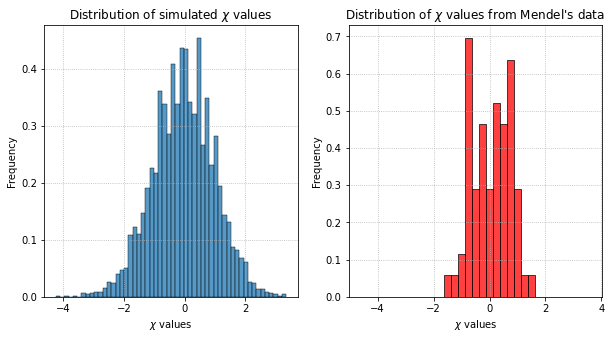

In [19]:
fig2,[ax6,ax7] = plt.subplots(1,2,figsize=(10,5))
sns.histplot(chi_clean,stat='density',ax=ax6)
ax6.set_ylabel('Frequency')
ax6.set_xlabel('$\chi$ values')
ax6.set_title('Distribution of simulated $\chi$ values')
ax6.grid(linestyle=':')

sns.histplot(chi_clean_mendel,stat='density',ax=ax7,bins=np.arange(ax6.get_xlim()[0],ax6.get_xlim()[-1],0.25),color='r')
ax7.set_xlabel('$\chi$ values')
ax7.set_ylabel('Frequency')
ax7.set_title("Distribution of $\chi$ values from Mendel's data")
ax7.grid(linestyle=':')
plt.show()

Decided to make sure the x-axis for both plots are the same... We seem to have cut out tails... Incriminating evidence...

### Now, let's visualize the cumulative distribution function (CDF)

In [20]:
CDF_chicleanmendel = get_cdfs(chi_clean_mendel)
CDF_chiclean = get_cdfs(chi_clean)

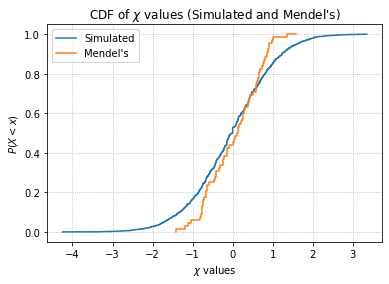

In [21]:
fig3,ax8 = plt.subplots(1,1)
ax8.step(CDF_chiclean[0],CDF_chiclean[1],label='Simulated')
ax8.step(CDF_chicleanmendel[0],CDF_chicleanmendel[1],label="Mendel's")
ax8.set_xlabel('$\chi$ values')
ax8.set_ylabel('$P(X<x)$')
ax8.set_title("CDF of $\chi$ values (Simulated and Mendel's)")
ax8.grid(linestyle=':')
ax8.legend(loc='best')
plt.show()

The fact the tails are cut out is quite strong evidence that there was systematic cooking of the data. Deviations beyond what he would perceive as a "threshold" simply don't appear in Mendel's data. Importantly, in doing the simulations assuming his laws are correct, I am getting a CDF with tails, meaning that a natural process following his laws should yield some of these rare instances of extreme values. Perhaps he was blind to the random nature of what he was studying, or too quick to judge an experimental run as a bad one just because of the result (assuming contamination without checking, for example).

### Using the empirical CDFs from above, how likely is it that the simulated and data distributions are statistically equivalent?  
Let's use the K.S. statistic, the A.D. statistic, and the R.O.C. method

Kolmogorov-Smirnov (K.S.) test

In [22]:
KS,p_valKS = stats.ks_2samp(chi_clean,chi_clean_mendel)
print(f"KS stat: {KS:.4f}, p-value: {p_valKS:.4f}")

KS stat: 0.1525, p-value: 0.0751


Anderson-Darling (A.D.) test

In [23]:
AD,critvalue_AD,p_valAD = stats.anderson_ksamp([chi_clean,chi_clean_mendel])
print(f"AD stat: {AD:.4f}, p-value: {p_valAD:.4f}\nCritical values for AD stat at 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%:")
print(critvalue_AD)

AD stat: 1.9597, p-value: 0.0506
Critical values for AD stat at 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%:
[0.325 1.226 1.961 2.718 3.752 4.592 6.546]


Receiver Operator Characteristic (R.O.C)

In [24]:
def common_grid(eCDFl,eCDFr):
    df_l = pd.DataFrame({'Values': list(eCDFl[0]), 'Percentiles': list(eCDFl[1])})
    df_r = pd.DataFrame({'Values': list(eCDFr[0]), 'Percentiles': list(eCDFr[1])})
    joined = pd.merge_ordered(df_l,df_r,on='Values',how='outer')
    left = list(joined['Percentiles_x'])
    right = list(joined['Percentiles_y'])

    for i in range(len(left)):
        if math.isnan(left[i]) and i == 0:
            left[i] = 0.0
        elif math.isnan(right[i]) and i == 0:
            right[i] = 0.0
        elif math.isnan(left[i]):
            left[i] = left[i-1]
        elif math.isnan(right[i]):
            right[i] = right[i-1]
            
    joined['left'] = left
    joined['right'] = right
    
    return joined[['Values','left','right']]

In [25]:
straightened = common_grid(CDF_chicleanmendel,CDF_chiclean)
straightened

,Values,left,right
0,-4.251502,0.0,0.000000
1,-3.962029,0.0,0.000145
2,-3.849742,0.0,0.000290
3,-3.674235,0.0,0.000435
4,-3.372884,0.0,0.000580
...,...,...,...
6907,3.228249,1.0,0.999420
6908,3.242554,1.0,0.999565
6909,3.259047,1.0,0.999710
6910,3.260350,1.0,0.999855


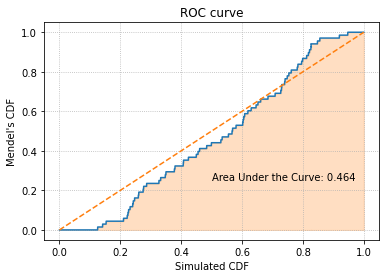

In [26]:
fig4,ax9 = plt.subplots(1,1)
ax9.plot(straightened['right'],straightened['left'])
ax9.plot([0,1],[0,1],'--')
ax9.fill_between(straightened['right'],straightened['left'],color='C1', alpha=0.25)
ax9.text(0.5, 0.25,f"Area Under the Curve: {np.trapz(straightened['left'],x=straightened['right']):.3f}")
ax9.set_xlabel('Simulated CDF')
ax9.set_ylabel("Mendel's CDF")
ax9.set_title("ROC curve")
ax9.grid(linestyle=':')
plt.show()

The three measures point to an inability to separate out the two distributions, making it seem they are similar. However, it is graphically clear that the main difference between the two distributions lies in the tails.  
As such, it seems the ROC captures this by how the curve looks at the lower left, and upper right (below, and then above the y=x line).  
It also looks like the AD test detected that difference given its slightly more confident measure of dissimularity.

### One of the most notable points in Mendel’s original paper is that at one point an experiment yielded 60 heterozygous plants for pod color and 40 were homozygous green, when an expected ratio was 2:1. This departure from expectation was so large that Mendel repeated this experiment recording 65:35 in the subsequent trial. This was the only experiment that Mendel felt compelled to repeat (and report), but should he have been concerned? How often can I expect to see such a deviation from expectation.

In [27]:
pDom = 2/3
dom = []
for i in range(10000):
    dom.append(np.sum(np.random.rand(N_sim2) <= pDom))    

prob_60_or_less = (dom.count(60)+dom.count(59)+dom.count(58)+dom.count(57)+dom.count(56)+dom.count(55)+dom.count(54)+dom.count(53)+dom.count(52)+dom.count(51)+dom.count(50)+dom.count(49))/len(dom)
print(f"From simulation, I would expect to see 60 heterozygous plants {prob_60_or_less*100:.2f}% of the time.\n")

exp = round(100*(2/3))
devs = np.arange(-20,20,1)
deviation = []
for dev in devs:
    prob_hold = 0
    for i in range(len(devs)):
        prob_hold += dom.count(exp+dev-i)
        
    p = prob_hold/len(dom)
    if p >= 0.025 and p <= 0.975:
        deviation.append(dev)
        print(f"p({exp+dev})={p*100:.2f}%")

        
print(f"\nMaximum deviation on the negative side: {deviation[0]}\nMaximum deviation on the positive side: {deviation[-1]}")

From simulation, I would expect to see 60 heterozygous plants 9.68% of the time.

p(57)=2.98%
p(58)=4.53%
p(59)=6.63%
p(60)=9.70%
p(61)=13.68%
p(62)=18.47%
p(63)=24.57%
p(64)=31.88%
p(65)=40.04%
p(66)=49.03%
p(67)=57.46%
p(68)=65.79%
p(69)=73.13%
p(70)=79.66%
p(71)=85.17%
p(72)=89.50%
p(73)=92.82%
p(74)=95.42%
p(75)=97.17%

Maximum deviation on the negative side: -10
Maximum deviation on the positive side: 8
